In [624]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from skimage.draw import line
from sklearn.datasets import make_blobs

In [3]:
matrix = np.zeros((11,11), dtype='uint8')
matrix[5,5] = 1
matrix[2,8] = 1
matrix[10,0] = 1
matrix[8,2] = 1
matrix

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=uint8)

In [4]:
kernel2 = np.zeros((3,3))
kernel2[2,0] = 1
kernel2[0,2] = 1
kernel2

kernel3 = np.flip(np.identity(kernel2.shape[0], dtype='uint8'), axis=1)


result1 = cv.filter2D(matrix, cv.CV_8U, kernel2, anchor=(2,0))
result1

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]], dtype=uint8)

In [5]:
result1[result1<2] = 0

result2 = result1//2
result2

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=uint8)

In [6]:
result3 = cv.dilate(result2, kernel3, anchor=(0,2))
result3

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=uint8)

In [11]:
kernel_base = np.zeros((10,10), dtype='uint8')

kernel = np.copy(kernel_base)

lx, ly = line(3,9,5,4)

kernel[ly, lx] = 1

kernel

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]], dtype=uint8)

0 ,  0 ,  498 ,  294
0 ,  0 ,  498 ,  294
0 ,  49 ,  498 ,  245
83 ,  0 ,  415 ,  294
0 ,  98 ,  498 ,  196
166 ,  0 ,  332 ,  294
0 ,  147 ,  498 ,  147
249 ,  0 ,  249 ,  294
0 ,  196 ,  498 ,  98
332 ,  0 ,  166 ,  294
0 ,  245 ,  498 ,  49
415 ,  0 ,  83 ,  294
0 ,  294 ,  498 ,  0
498 ,  0 ,  0 ,  294


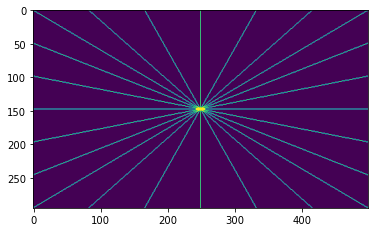

In [201]:
######### TEST SETUP ###########

h_im = 295
w_im = 499

n_line = 7

image = np.zeros((h_im, w_im), dtype='uint8')

for i in range(n_line):
    x1 = 0
    x2 = w_im - 1
    
    y1 = i * ((( h_im-1) // (n_line - 1)) - 1) + i
    y2 = (h_im-1) - i * (h_im // (n_line - 1))
    
    print(x1,', ', y1,', ', x2,', ', y2)
    
    lx, ly = line(x1, y1, x2, y2)
    image[ly, lx] = 1
    
    y1 = 0
    y2 = h_im - 1
    
    x1 = i * ((( w_im-1) // (n_line - 1)) - 1) + i
    x2 = (w_im-1) - i * (w_im // (n_line - 1))
    
    print(x1,', ', y1,', ', x2,', ', y2)
    
    lx, ly = line(x1, y1, x2, y2)
    image[ly, lx] = 1
    

plt.imshow(image)

0 ,  0 ,  499 ,  499
70 ,  0 ,  428 ,  499
0 ,  71 ,  499 ,  428
141 ,  0 ,  357 ,  499
0 ,  142 ,  499 ,  357
212 ,  0 ,  286 ,  499
0 ,  213 ,  499 ,  286
283 ,  0 ,  215 ,  499
0 ,  284 ,  499 ,  215
354 ,  0 ,  144 ,  499
0 ,  355 ,  499 ,  144
425 ,  0 ,  73 ,  499
0 ,  426 ,  499 ,  73
496 ,  0 ,  2 ,  499


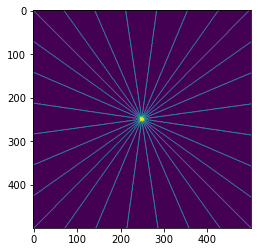

In [855]:
######### TEST SETUP ###########

h_im = 500
w_im = 500

n_line = 7

image = np.zeros((h_im, w_im), dtype='uint8')

for i in range(n_line):
    x1 = 0
    x2 = w_im - 1
    
    y1 = i * ((( h_im-1) // (n_line )) - 1) + i
    y2 = (h_im-1) - i * (h_im // (n_line))
    
    print(x1,', ', y1,', ', x2,', ', y2)
    
    lx, ly = line(x1, y1, x2, y2)
    image[ly, lx] = 1
    
    y1 = 0
    y2 = h_im - 1
    
    x1 = (i+1) * ((( w_im-1) // (n_line)) - 1) + i
    x2 = (w_im-1) - (i+1) * (w_im // (n_line))
    
    print(x1,', ', y1,', ', x2,', ', y2)
    
    lx, ly = line(x1, y1, x2, y2)
    image[ly, lx] = 1
    

plt.imshow(image)

In [338]:
result = np.zeros(image.shape, dtype='uint8')

temp_base = np.copy(result)

kernel_size = 10
end = kernel_size - 1

kernel = np.zeros( ( kernel_size, kernel_size ), dtype = 'uint8' )


x1 = end
x1a = 0

x2 = 0
x2a = end

i = 0

In [339]:
######## 1 #########

In [340]:
y1 = i
y1a = end - i

y2 = y1a
y2a = y1

kernel_filter = np.copy(kernel)
kernel_dil = np.copy(kernel)

i += 1

In [341]:
kernel_filter [y1, x1] = 1
kernel_filter [y2, x2] = 1

kernel_filter

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=uint8)

In [342]:
lx, ly = line(x1, y1, x2, y2)

kernel_dil[ ly, lx ] = 1

kernel_dil

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=uint8)

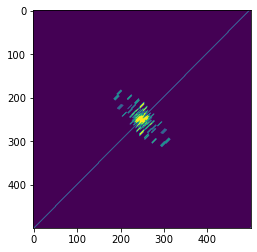

In [343]:
temp_filtered = cv.filter2D( image, cv.CV_8U, kernel_filter, anchor=(x1a, y1a))
#temp_filtered2 = cv.filter2D( image, cv.CV_8U, kernel_filter, anchor=(x2a, y2a))
#temp_filtered = np.maximum(temp_filtered1, temp_filtered2)
temp_filtered[temp_filtered<2] = 0

temp_dilated = cv.dilate(temp_filtered, kernel_dil, anchor=(x2a,y2a))
#temp_dilated2 = cv.dilate(temp_filtered, kernel_dil, anchor=(x2a,y2a))
#temp_dilated = np.maximum(temp_dilated1, temp_dilated2)
temp_dilated[temp_dilated>0] = 1

result = np.maximum(result, temp_dilated)
plt.imshow(result)

In [328]:
######## 1a #########

In [500]:
result = np.zeros(image.shape, dtype='uint8')
temp_filtered = np.zeros(image.shape, dtype='uint8')
temp_dilated = np.zeros(image.shape, dtype='uint8')

kernel_size = 3

In [534]:

end = kernel_size - 1

kernel = np.zeros( ( kernel_size, kernel_size ), dtype = 'uint8' )


x1 = end
x1a = 0

x2 = 0
x2a = end

i = 0

In [541]:
y1 = i
y1a = end - i

y2 = y1a
y2a = y1

kernel_filter = np.copy(kernel)
kernel_dil = np.copy(kernel)

i += 1

kernel_filter [y1, x1] = 1
kernel_filter [y2, x2] = 1

lx, ly = line(x1, y1, x2, y2)
kernel_dil[ ly, lx ] = 1

temp_filtered = cv.filter2D( image, cv.CV_8U, kernel_filter, anchor=(x1a, y1a))
temp_filtered[temp_filtered<2] = 0

temp_dilated = cv.dilate(temp_filtered, kernel_dil, anchor=(x2a,y2a))
temp_dilated[temp_dilated>0] = 1

result = np.maximum(result, temp_dilated)
plt.imshow(result[150:350,150:350])

IndexError: index 6 is out of bounds for axis 0 with size 6

In [542]:
y1 = end - 1
y1a = 1

y2 = 1
y2a = end - 1 

i = 1

In [548]:
x1 = i
x1a = end - i

x2 = x1a
x2a = x1

kernel_filter = np.copy(kernel)
kernel_dil = np.copy(kernel)

i += 1

kernel_filter [y1, x1] = 1
kernel_filter [y2, x2] = 1

lx, ly = line(x1, y1, x2, y2)
kernel_dil[ ly, lx ] = 1

temp_filtered = cv.filter2D( image, cv.CV_8U, kernel_filter, anchor=(x1a, y1a))
temp_filtered[temp_filtered<2] = 0

temp_dilated = cv.dilate(temp_filtered, kernel_dil, anchor=(x2a,y2a))
temp_dilated[temp_dilated>0] = 1

result = np.maximum(result, temp_dilated)
plt.imshow(result[150:350,150:350])

IndexError: index 6 is out of bounds for axis 1 with size 6

In [549]:
kernel_size += 1

In [551]:
######## 2 #########

In [615]:
result = np.zeros(image.shape, dtype='uint8')
temp_filtered = np.zeros(image.shape, dtype='uint8')
temp_dilated = np.zeros(image.shape, dtype='uint8')

kernel_size_min = 3
kernel_size_max = 31

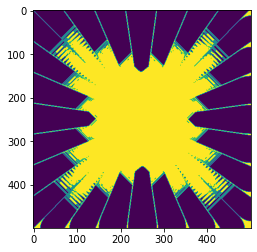

In [617]:
for i in range(kernel_size_min, kernel_size_max+1, 1):
    
    end = i - 1

    kernel = np.zeros( (i, i), dtype = 'uint8' )


    x1 = end
    x1a = 0
    x2 = 0
    x2a = end

    for j in range(0, i):
    
        y1 = j
        y1a = end - j

        y2 = y1a
        y2a = y1

        kernel_filter = np.copy(kernel)
        kernel_dil = np.copy(kernel)

        kernel_filter [y1, x1] = 1
        kernel_filter [y2, x2] = 1

        lx, ly = line(x1, y1, x2, y2)
        kernel_dil[ ly, lx ] = 1

        temp_filtered = cv.filter2D( image, cv.CV_8U, kernel_filter, anchor=(x1a, y1a))
        temp_filtered[temp_filtered<2] = 0

        temp_dilated = cv.dilate(temp_filtered, kernel_dil, anchor=(x2a,y2a))
        temp_dilated[temp_dilated>0] = 1

        result = np.maximum(result, temp_dilated)

    
    y1 = end - 1
    y1a = 1

    y2 = 1
    y2a = end - 1

    
    for j in range(1, i-1):
        
        x1 = j
        x1a = end - j

        x2 = x1a
        x2a = x1

        kernel_filter = np.copy(kernel)
        kernel_dil = np.copy(kernel)

        i += 1

        kernel_filter [y1, x1] = 1
        kernel_filter [y2, x2] = 1

        lx, ly = line(x1, y1, x2, y2)
        kernel_dil[ ly, lx ] = 1

        temp_filtered = cv.filter2D( image, cv.CV_8U, kernel_filter, anchor=(x1a, y1a))
        temp_filtered[temp_filtered<2] = 0

        temp_dilated = cv.dilate(temp_filtered, kernel_dil, anchor=(x2a,y2a))
        temp_dilated[temp_dilated>0] = 1

        result = np.maximum(result, temp_dilated)
        
plt.imshow(result)

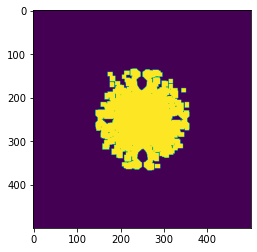

In [606]:
result1 = cv.morphologyEx( result, cv.MORPH_OPEN, np.ones((10,10), dtype='uint8'))
plt.imshow(result1)

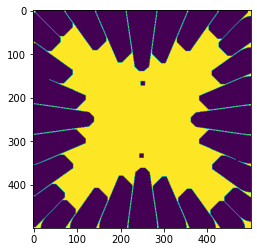

In [607]:
result2 = cv.morphologyEx( result, cv.MORPH_CLOSE, np.ones((10,10), dtype='uint8'))
plt.imshow(result2)

In [608]:
######## 3 #########

In [906]:
def aesopsFilter(image, kernel_size_min, kernel_size_max):
    
    # Set up the result and 
    
    result = np.zeros(image.shape, dtype='uint8')
    temp_filtered = np.zeros(image.shape, dtype='uint8')
    temp_dilated = np.zeros(image.shape, dtype='uint8')
    
    for i in range(kernel_size_min, kernel_size_max+1, 2):

        end = i - 1

        #kernel = np.zeros( (i, i), dtype = 'uint8' )


        x1 = end
        x1a = 0
        x2 = 0
        x2a = end

        for j in range(0, i):

            y1 = j
            y1a = end - j

            y2 = y1a
            y2a = y1

            kernel_filter = np.copy(kernel)
            kernel_dil = np.copy(kernel)

            kernel_filter [y1, x1] = 1
            kernel_filter [y2, x2] = 1

            lx, ly = line(x1, y1, x2, y2)
            kernel_dil[ ly, lx ] = 1

            temp_filtered = cv.filter2D( image, cv.CV_8U, kernel_filter, anchor=(x1a, y1a), borderType = cv.BORDER_CONSTANT|0)
            temp_filtered[temp_filtered<2] = 0

            temp_dilated = cv.dilate(temp_filtered, kernel_dil, anchor=(x2a,y2a), borderType = cv.BORDER_CONSTANT|0)
            temp_dilated[temp_dilated>0] = 1

            result = np.maximum(result, temp_dilated)


        y1 = end - 1
        y1a = 1

        y2 = 1
        y2a = end - 1


        for j in range(1, i-1):

            x1 = j
            x1a = end - j

            x2 = x1a
            x2a = x1

            kernel_filter = np.copy(kernel)
            kernel_dil = np.copy(kernel)

            i += 1

            kernel_filter [y1, x1] = 1
            kernel_filter [y2, x2] = 1

            lx, ly = line(x1, y1, x2, y2)
            kernel_dil[ ly, lx ] = 1

            temp_filtered = cv.filter2D( image, cv.CV_8U, kernel_filter, anchor=(x1a, y1a), borderType = cv.BORDER_CONSTANT|0)
            temp_filtered[temp_filtered<2] = 0

            temp_dilated = cv.dilate(temp_filtered, kernel_dil, anchor=(x2a,y2a), borderType = cv.BORDER_CONSTANT|0)
            temp_dilated[temp_dilated>0] = 1

            result = np.maximum(result, temp_dilated)

    return result

In [815]:
mask = aesopsFilter(image, 3, 31)

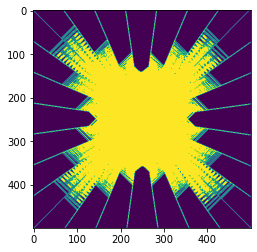

In [816]:
plt.imshow(mask)

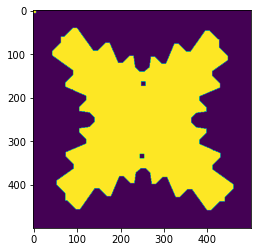

In [819]:
mask1 = aesopsFilter(image, 31, 31)
mask2 = cv.morphologyEx( mask1, cv.MORPH_CLOSE, np.ones((10,10), dtype='uint8'))
mask3 = cv.morphologyEx( mask2, cv.MORPH_OPEN, np.ones((10,10), dtype='uint8'))
plt.imshow(mask3)

In [1039]:
def add_blobs(img, n_samples, n_components, cluster_std, random_state):

    h = img.shape[0]
    w = img.shape[1]
    
    X, y_true = make_blobs(n_samples=n_samples,
                           centers=n_components,
                           cluster_std=cluster_std,
                           random_state=random_state)

    X[:, 0] = X[:,0] - X[:,0].min()
    X[:, 0] = X[:,0] / X[:,0].max()
    X[:, 0] = (h - 1) * X[:, 0]

    X[:, 1] = X[:,1] - X[:,1].min()
    X[:, 1] = X[:,1] / X[:,1].max()
    X[:, 1] = (w-1) * X[:, 1]

    X = X.astype(np.int32)

    img[ X[:,0], X[:,1]] = 1
    
    return img

In [1052]:
n_samples = 500000
n_components = 35
cluster_std = 0.6

h = 1000
w = 1000

image2 = np.zeros((h,w), dtype='uint8')

image2 = add_blobs(image2, n_samples, n_components, cluster_std, 5)

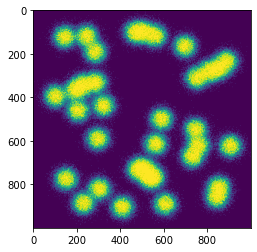

In [1058]:
plt.imshow(image2)

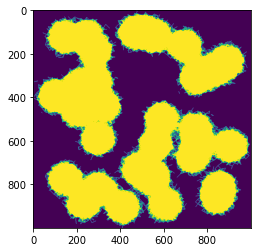

In [1065]:
mask1 = aesopsFilter(image2, 3, 20)
plt.imshow(mask1)

In [ ]:
mask1 = aesopsFilter(mask1, 3, 3)
plt.imshow(mask1)

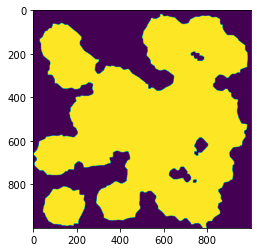

In [758]:
mask1 = aesopsFilter(image2, 3, 31)
mask2 = cv.morphologyEx( mask1, cv.MORPH_CLOSE, np.ones((10,10), dtype='uint8'))
mask3 = cv.morphologyEx( mask2, cv.MORPH_OPEN, np.ones((10,10), dtype='uint8'))
plt.imshow(mask3)

In [ ]:
######## 4 #########

In [1]:
def aesopsFilter1(image, kernel_size_min, kernel_size_max, series=False):
    
    # Set up the resulting image
    
    result = np.zeros(image.shape, dtype='uint8')

    
    # Generate coordinates for edge pixels and 
    
    for i in range(kernel_size_min, kernel_size_max+1, 2):

        end = i - 1
        
        c = np.arange(end, dtype='uint8')
        
        result = apply_filter(result, image, 0, 0, end, 0)
        result = apply_filter(result, image, 0, 0, 0, end)
        result = apply_filter(result, image, 0, 0, end, end)
        result = apply_filter(result, image, 0, end, end, 0)

        for a in range(1, end, 3):
            result = apply_filter(result, image, 0, 0, end, a)
            result = apply_filter(result, image, end, 0, 0, a)
            result = apply_filter(result, image, 0, 0, a, end)
            result = apply_filter(result, image, 0, end, a, 0)
    
        if series == True :
            image = np.copy(result)
    
    return result

def apply_filter(result, image, x1, y1, x2, y2):
    
    temp_filtered = np.zeros(image.shape, dtype='uint8')
    temp_dilated = np.zeros(image.shape, dtype='uint8')
    
    kx = np.abs(x2-x1) + 1
    ky = np.abs(y2-y1) + 1
    
    kernel_filter = np.zeros((ky,kx), dtype='uint8')
    kernel_dil = np.zeros((ky,kx), dtype='uint8')
    
    kernel_filter [y1, x1] = 1
    kernel_filter [y2, x2] = 1

    lx, ly = line(x1, y1, x2, y2)
    kernel_dil[ ly, lx ] = 1

    temp_filtered = cv.filter2D( image, cv.CV_8U, kernel_filter, anchor=(x1, y1), borderType = cv.BORDER_CONSTANT|0)
    temp_filtered[temp_filtered<2] = 0

    temp_dilated = cv.dilate(temp_filtered, kernel_dil, anchor=(x2,y2), borderType = cv.BORDER_CONSTANT|0)
    temp_dilated[temp_dilated>0] = 1

    result = np.maximum(result, temp_dilated)


    return result

<class 'numpy.ndarray'>


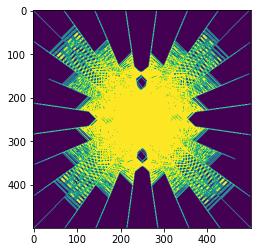

In [1101]:
mask = aesopsFilter(image, 31, 31)

print(type(mask))

plt.imshow(mask)

In [1102]:
%timeit mask = aesopsFilter(image2, 31, 31)
%timeit mask = aesopsFilter1(image2, 31, 31)

1.01 s ± 46.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
633 ms ± 2.94 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<class 'numpy.ndarray'>


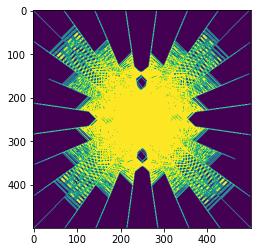

In [1103]:
mask = aesopsFilter(image, 31, 31)

print(type(mask))

plt.imshow(mask)

In [2]:
mask = aesopsFilter1(image, 31, 31)

print(type(mask))

plt.imshow(mask)

NameError: name 'image' is not defined

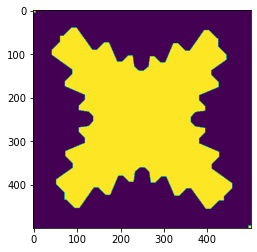

In [1108]:
mask1 = aesopsFilter1(image, 31, 31)
mask2 = cv.morphologyEx( mask1, cv.MORPH_CLOSE, np.ones((11,11), dtype='uint8'))
mask3 = cv.morphologyEx( mask2, cv.MORPH_OPEN, np.ones((11,11), dtype='uint8'))
plt.imshow(mask3)

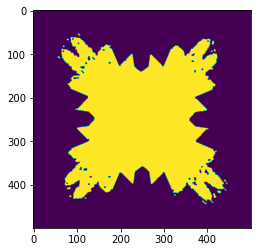

In [1005]:
mask1 = aesopsFilter1(image, 31, 31)
mask2 = cv.morphologyEx( mask1, cv.MORPH_OPEN, np.ones((3,3), dtype='uint8'))
mask3 = cv.morphologyEx( mask2, cv.MORPH_CLOSE, np.ones((3,3), dtype='uint8'))
plt.imshow(mask3)

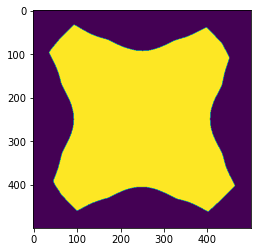

In [1017]:
mask3 = aesopsFilter1(mask3, 31, 31)
plt.imshow(mask3)

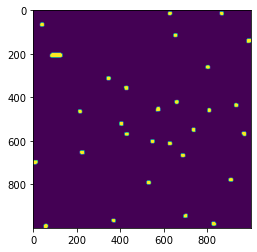

In [946]:
mask1 = aesopsFilter(image2, 3, 31)
mask2 = cv.morphologyEx( mask1, cv.MORPH_CLOSE, np.ones((10,10), dtype='uint8'))
mask3 = cv.morphologyEx( mask2, cv.MORPH_OPEN, np.ones((10,10), dtype='uint8'))
plt.imshow(mask3)

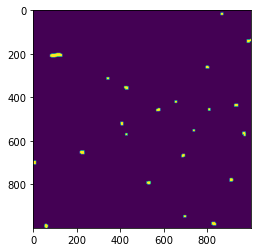

In [976]:
mask1 = aesopsFilter1(image2, 21, 21)
mask2 = cv.morphologyEx( mask1, cv.MORPH_CLOSE, np.ones((10,10), dtype='uint8'))
mask3 = cv.morphologyEx( mask2, cv.MORPH_OPEN, np.ones((10,10), dtype='uint8'))
plt.imshow(mask3)

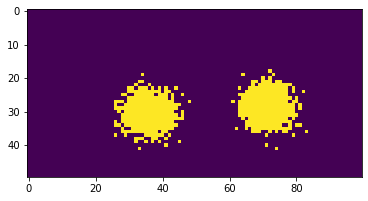

In [977]:
plt.imshow(image2[175:225, 50:150])

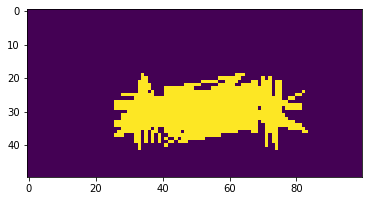

In [978]:
plt.imshow(mask1[175:225, 50:150])

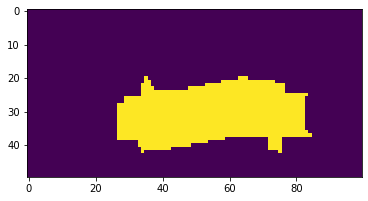

In [979]:
plt.imshow(mask2[175:225, 50:150])

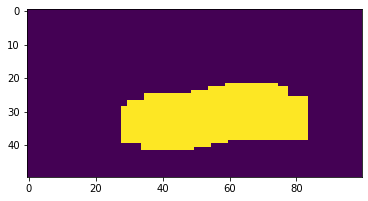

In [980]:
plt.imshow(mask3[175:225, 50:150])